In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [3]:
backend = Aer.get_backend("qasm_simulator")

---

# Oracles:

## $U_{id}$

In [4]:
u_id_inner = QuantumCircuit(2, name='U_id')
u_id_inner.cnot(0,1);
u_id = u_id_inner.to_instruction()
u_id_inner.draw('mpl')

(Recall that in Qiskit the order of the tensors is from MSB to LSB: $Q_{n-1}\otimes \dotsb \otimes Q_{0}$.)

$U_{id}$ is defined by:
\begin{align}
|00\rangle & \mapsto |00\rangle \\
|01\rangle & \mapsto |11\rangle \\
|10\rangle & \mapsto |10\rangle \\
|11\rangle & \mapsto |01\rangle \\
\end{align}

Verification:
\begin{align}
CNOT_{0,1}|00\rangle & = |00\rangle \\
CNOT_{0,1}|01\rangle & = |11\rangle \\
CNOT_{0,1}|10\rangle & = |10\rangle \\
CNOT_{0,1}|11\rangle & = |01\rangle \\
\end{align}

## $U_{not}$

In [5]:
u_not_inner = QuantumCircuit(2, name='U_not')
u_not_inner.x(0)
u_not_inner.cnot(0,1)
u_not_inner.x(0)
u_not = u_not_inner.to_instruction()
u_not_inner.draw('mpl')

$U_{not}$ is defined by:
\begin{align}
|00\rangle & \mapsto |10\rangle \\
|01\rangle & \mapsto |01\rangle \\
|10\rangle & \mapsto |00\rangle \\
|11\rangle & \mapsto |11\rangle \\
\end{align}

Verification:
\begin{align}
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |00\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|01\rangle =
(I\otimes X)|11\rangle = |10\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |01\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|00\rangle =
(I\otimes X)|00\rangle = |01\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |10\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|11\rangle =
(I\otimes X)|01\rangle = |00\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |11\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|10\rangle =
(I\otimes X)|10\rangle = |11\rangle\\
\end{align}

## $U_{c_0}$

In [6]:
u_c0_inner = QuantumCircuit(2, name='U_c0')
u_c0 = u_c0_inner.to_instruction()
u_c0_inner.draw('mpl')

$U_{c_0}$ is defined by:
\begin{align}
|00\rangle & \mapsto |00\rangle \\
|01\rangle & \mapsto |01\rangle \\
|10\rangle & \mapsto |10\rangle \\
|11\rangle & \mapsto |11\rangle \\
\end{align}

Verification:
\begin{align}
|00\rangle & = |00\rangle \\
|01\rangle & = |01\rangle \\
|10\rangle & = |10\rangle \\
|11\rangle & = |11\rangle \\
\end{align}

## $U_{c_1}$

In [7]:
u_c1_inner = QuantumCircuit(2, name='U_c1')
u_c1_inner.x(1)
u_c1 = u_c1_inner.to_instruction()
u_c1_inner.draw('mpl')

$U_{c_1}$ is defined by:
\begin{align}
|00\rangle & \mapsto |10\rangle \\
|01\rangle & \mapsto |11\rangle \\
|10\rangle & \mapsto |00\rangle \\
|11\rangle & \mapsto |01\rangle \\
\end{align}

Verification:
\begin{align}
X\otimes I|00\rangle & = |10\rangle \\
X\otimes I|01\rangle & = |11\rangle \\
X\otimes I|10\rangle & = |00\rangle \\
X\otimes I|11\rangle & = |01\rangle \\
\end{align}

# The Deutsch algorithm:

In [8]:
c = QuantumCircuit(2,1)

In [9]:
c.x(1);

In [10]:
c.barrier();

In [11]:
c.h(0);
c.h(1);

In [12]:
#c.append(u_id, [0, 1]);
#c.append(u_not, [0, 1]);
c.append(u_c0, [0, 1]);
# c.append(u_c1, [0, 1]);

In [13]:
c.h(0);

In [14]:
c.barrier();

In [15]:
c.measure(0,0);

In [16]:
c.draw("mpl")
#c.decompose().draw("mpl")

# Experiment:

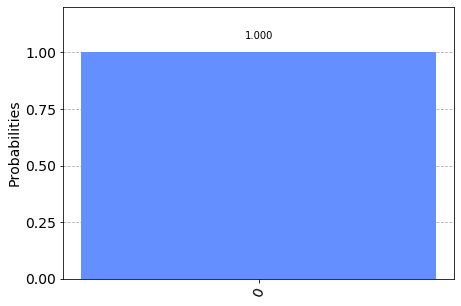

In [36]:
job = execute(c, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

# Verifications:

## Deutsch$(U_{id})$

\begin{align}
U_{id}|-+\rangle & = U_{id}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|00\rangle + |11\rangle - |10\rangle - |01\rangle)\\
& = |--\rangle\\
(I \otimes H)\circ U_{id}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{id}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{id}|-+\rangle\\
& = (I \otimes H)|--\rangle\\
& = |-1\rangle\\
\end{align}

## Deutsch$(U_{not})$

\begin{align}
U_{not}|-+\rangle & = U_{not}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|10\rangle + |01\rangle - |00\rangle - |11\rangle)\\
& = -|--\rangle\\
(I \otimes H)\circ U_{not}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{not}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{not}|-+\rangle\\
& = -(I \otimes H)|--\rangle\\
& = -|-1\rangle\\
\end{align}

## Deutsch$(U_{c_0})$

\begin{align}
U_{c_0}|-+\rangle & = |-+\rangle\\
(I \otimes H)\circ U_{c_0}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{c_0}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{c_0}|-+\rangle\\
& = (I \otimes H)|-+\rangle\\
& = |-0\rangle\\
\end{align}

## Deutsch$(U_{c_1})$

\begin{align}
U_{c_1}|-+\rangle & = U_{c_1}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|10\rangle + |11\rangle - |00\rangle - |01\rangle)\\
& = -|-+\rangle\\
(I \otimes H)\circ U_{c_1}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{c_1}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{c_1}|-+\rangle\\
& = -(I \otimes H)|-+\rangle\\
& = -|-0\rangle\\
\end{align}

---